<div style="background-color:lightgrey;
            padding:10px;
            color:black;
            border:black dashed 2px;
            border-radius:5px;
            margin: 20px 0;">
            
            
# Mathematical Notations and Numpy
This session is devided into two parts: 1. Mathematical Notations, and 2. Linear Algebra with Numpy.


**Staff:** Mike Kestemont <br/>
**Support Material:** [exercises](https://github.com/dtaantwerp/dtaantwerp.github.io/blob/DTA_Bootcamp_2021_students/exercises/Questions_2023/11_EX_Numpy.ipynb) <br/>
**Support Sessions:**  Tuesday, October 10, 10:30AM

</div>


This notebook is based on the chapter *Exploring Texts using the Vector Space Model* from *Humanities Data Analysis: Case Studies with Python*. <br>
(Karsdorp, F., Kestemont, M., & Riddell, A. (2021). Humanities Data Analysis: Case Studies with Python. Princeton University Press.)

In [ ]:
import math

## Functions

The concept of "function" will occur several times throughout this master's programme:
*  python functions
*  mathematical functions

In mathematics, a function maps each element in an input set (its domain) to exactly one element in an output set (its codomain):

*  $f(x) = x+1$ 
*  $f(x) = x^2$ 
*  $f(x) = 3x^4 + 28x^3 + \frac{13}{2}x^2 + 2x + 5$

Let's code the function presented above and run it with an input:

In [ ]:
def f(x):
    return 3*x**4 + 28*x**3 + 13/2*x**2 + 2*x + 5

x = 4
y = f(x)
print(f"input: {x}; output: {y}")

When the input and output sets are numerical, the function can be visualised by plotting it into a two-dimensional space. The (horizontal) x-axis represents all possible input values. The (vertical) y-axis represents all possible output values. The plot indicates which input value maps to which output value.

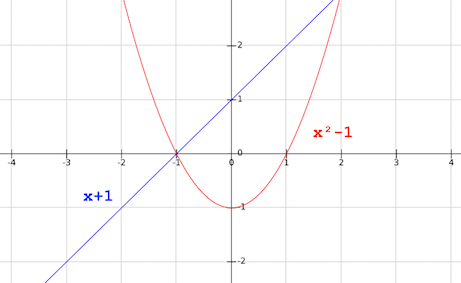

### Linear functions

In data modelling, a special significance is attached to linear functions. The plot of a linear function is simply a straight line. Its equation takes the shape of $f(x) = mx + q$. Algebraically, it consists of x to the power of one (and only to the power of one) multiplied by a coëfficient plus some constant.

The following two functions, for example, are linear:

* $f(x) = 7x - 1$
* $f(x) = \frac{-3}{2}x + \frac{1}{5}$

The following functions aren't linear: they either have $x$ as an exponent, or include a power of $x$ that is not $1$. The first equation has $x$ squared; the second has $\frac{1}{x}$, which is $x$ to the power of -1. As a result, their plots are not just straight lines.

* $f(x) = 3x^2 - 7x + 2$
* $f(x) = \frac{1}{x}$
* $f(x) = 2^x + 3$


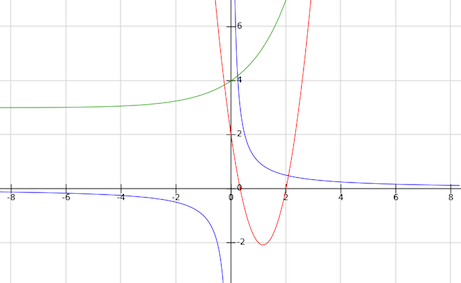

---
**One of the following functions is not linear. Which one?**  
* A) $f(x) = \sqrt{x} + 4$ 
* B) $f(x) = 8x + \frac{1}{3}$
* C) $f(x) = 9$ 
---





---


In a linear function $f(x) = mx + q$:
* $q$ indicates the **intersection with the y-axis**:
  * when $q$ is zero, the line goes through the origin
* $m$ refers to the **slope** of the line:
  * lines with positive slopes go up
  * lines with negative slopes go down
  * the higher the absolute value of the slope, the steeper the line
  


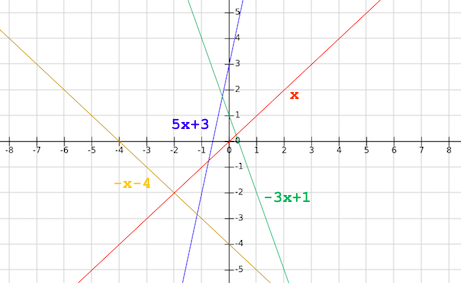

---
**Match the following equations to the figure below. Which colors are they plotted in?**
* A) $f(x) = -4x + 1$
* B) $f(x) = x - 3$ 
* C) $f(x) = 5x - 2$



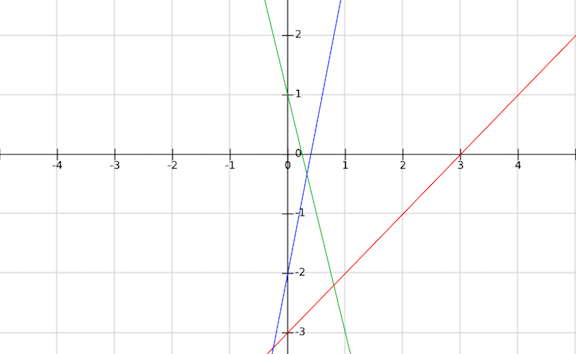
---

---

Linear functions are important in datamodelling because a fair number of classification models rely on them.

A dataset that consists of datapoints belonging to two classes is said to be lineary classifiable when you can draw a straight line that separates all datapoints of class A from those of class B.

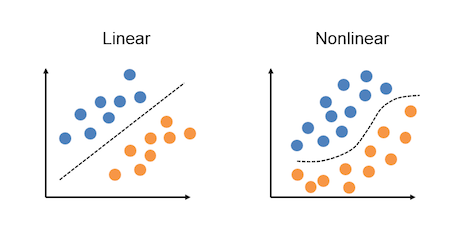

Because a linear classifier requires its dataset to be linearly separable, it can never be a perfect model of the dataset on the right.

## Max and argmax

The functions max() and min() are straightforward to interpret:
* if given a list of values as input, they return the highest and lowest value in the list respectively


In [ ]:
scores = [19, 8, 11, 10, 12, 14, 14, 16]
print(f"Max: {max(scores)}")
print(f"Min: {min(scores)}")

* if given a function as input, they return the highest and lowest possible output value of that function respectively:

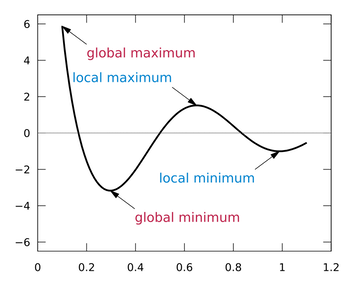

The functions argmax() and argmin() are related to max() and min(), but instead of returning the highest or lowest value itself, they return the **position** of the highest or lowest value.

* applied to a list, argmax returns the index of the highest value:

In [81]:
import numpy as np

scores = [19, 8, 11, 10, 12, 14, 14, 16]
print(f"Max: {np.argmax(scores)}")
print(f"Min: {np.argmin(scores)}")

Max: 0
Min: 1


Applied to a function, argmax returns the input value that yields the highest output:

* $f(x) = -x^2 + 1$ 
* $max f(x) = 1$ 
* $\underset{x}{\operatorname{argmax}} f(x) = 0$ 


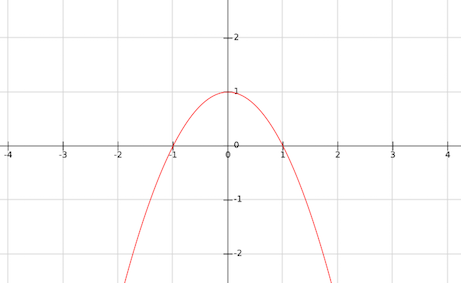

You'll encounter argmin and argmax a few times throughout this master's programme because many machine learning models, like neural networks, consist of millions variables. Each of these variables influences the behaviour of the model a tiny bit. Because you want your model's output to be as accurate as possible, you'll want to know which values for each parameter lead to the best output. That's where argmax comes in.

---
**The figure below plots the following function:**

> $f(x) = 2x^4 + x^3-3x^2-1$

**Two of the following statements are true. Which ones?**
* A) $argmin_x f(x) = -3$
* B) $min f(x) = -3$
* C) $f(x)$ reaches a global maximum for x=0
* D) $f(x)$ reaches a local maximum for x=0



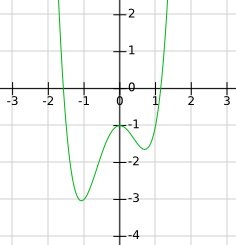

---

<div style="background-color:lightgrey;
            padding:10px;
            color:black;
            border:lightgrey solid 2px; 
            border-radius:5px;
            margin: 20px 0;
            text-align:center">
  
# PART 2 : Vectors and Numpy arrays

</div>


This part will cover basic concepts of linear algebra and their implementation in numpy.

We will discuss:

- Array creation
- Array element access

Vectors and matrices are some of the most fundamental building blocks of computer science. Their importance can hardly be overstated. Vectors and matrices not only make it easier to train machine learning models, they are also a great means of data representation.

## Why do we need matrices and vectors?
- Matrix (and vector) is a way to put multiple similar problems into one container or array and, then, to conduct multiple similar manipulations with it.
- Modern GPUs (Graphics Processing Units) and TPUs (Tensor Processing Units) are able to conduct efficient parallel calculations.
- There are highly optimized linear algebra libraries like numpy, pytorch, tensorflow. 
- All modern neural networks (and other algorithms) are based on matrices and vectors (tensors)

## Matrices and Vectors

Matrix is a rectangular (or 2-D) array of numbers:

>$A =
 \begin{pmatrix}
  10 & 19 & 40 & 20 \\
  20 & 67 & 38 & 91\\
  40  & 91  & 4 & 51  \\
  10 & 44 & 59 & 43 \\
  31 & 45 & 85 & 18
 \end{pmatrix}$

Matrices usually represent features (weights and many other things) in machine learning. 

Vector (1-D array) is a matrix with one column (or one row):

>$\vec{x} =
 \begin{pmatrix}
  10 \\ 19 \\ 40 \\ 20 
  \end{pmatrix}$

Dimension or shape of a matrix: $\mathbb{R}^{r \times c}$ or the number of rows $\times $ the number of columns. **QUESTION** What is dimension of  $A$ and $\vec{x}$?

## From text to vector

**A bag-of-words** model is a way of representing a text as numbers. A text document is divided into individual words or tokens. This process typically involves removing punctuation, converting all text to lowercase, and splitting the text into words based on spaces or other delimiters. Next, a vocabulary is created by collecting all unique words (tokens) from the entire corpus of document. For each document in the corpus, a vector is created where each element corresponds to a word in the vocabulary, and the value at each element represents the frequency of that word's occurrence in the document. So, each document is represented as a vector where the length of the vector is equal to the size of the vocabulary, and each element is the count of how many times a word from the vocabulary appears in the document.

Take, for instance, the following two sentences:
- I am singing in the rain.
- I am dancing in the sun.

A bag-of-words representation of this mini-corpus will look like this.

|    Token   | I | am | singing | in | the | rain | dancing | sun |
|:----------:|:-:|:--:|:-------:|:--:|:---:|:----:|:-------:|:---:|
| Sentence 1 | 1 |  1 |    1    |  1 |  1  |   1  |    0    |  0  |
| Sentence 2 | 1 |  1 |    0    |  1 |  1  |   0  |    1    |  1  |

 In this matrix, each row corresponds to a document, each column corresponds to a word in the vocabulary, and the cell values indicate how often a specific word appears in a document. With larger corpora most tokens will have a value of zero. In this tabular format, each row can be seen as a vector in a vector space and this type of matrix arrangement is therefore often referred to as a **document-term matrix.**


In [ ]:
#scalar -> vector -> matrix -> tensor
#use lowercase for vector notation and upper for matrix or higher

In [91]:
document_term_matrix = [[1,1,1,1,1,1,0,0], [1,1,0,1,1,0,1,1]]

# Numpy arrays

In the preceding section, we've shown how to build a document-term matrix which is now prepared to be converted into a two-dimensional NumPy array, making it easier to store and work with efficiently. 

A key distinction between NumPy arrays and Python's built-in lists is that NumPy arrays have a specific, unchangeable data type for all elements, while Python lists allow mixed types that can be freely altered (e.g., a mix of strings and integers). COnsequently, NumPy's fixed-type arrays are much more efficient in terms of both storage and operations. 

In [3]:
#First, you'll have to import numpy
import numpy as np

NumPy arrays can be created in two ways: 
- either by converting a list into an array 
- by using built-in NumPy functions. 

For instance, if you want to create an array of floating-point numbers from a list, you can do so with the following code:

In [10]:
a = np.array([1.0, 0.5, 0.33, 0.25, 0.2])
print(a.shape)
print(a.dtype)

#You can also create an array of integers.

b = np.array([1, 3, 6, 10, 15], dtype = np.int64)
print(b.dtype)

# we can also define an array from tuples.
c = np.array(((1,2,3),(4,5,6)))
print(c.shape) #tuples are seen as rows, and the different entries as columns
print(c.dtype)

print(type(a))
print(type(b))
print(type(c))

(5,)
float64
int64
(2, 3)
int32
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Now we can convert the document term matrix we created earlier into a numpy array.

In [12]:
document_term_matrix = [[1,1,1,1,1,1,0,0], [1,1,0,1,1,0,1,1]]
document_term_matrix = np.array(document_term_matrix)
print(document_term_matrix.shape)

(2, 8)


You can print the shape attribute of the resulting object to confirm that its dimensions still match our original vector space model.

In [13]:
document_term_matrix.shape

(2, 8)

We can fill all elements with zeros or ones. Shape is defined as int or tuple of ints.

In [14]:
np.zeros(shape=(3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [20]:
np.ones(shape=(5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

NumPy's counterpart to Python's range() function is numpy.arange(), which creates number sequences as arrays. A notable difference is that numpy.arange() accepts floats as inputs, making it convenient for generating sequences of floating-point numbers. We can create a vector (or 1-D array) filled with evenly spaced values within a given interval like this:

In [18]:
np.arange(start=1, stop=7, step=0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5])

We can also create a matrix filled with evenly spaced values within a given interval. We will need the reshape method. It maps values from an existing array to an array with the given shape.

In [22]:
np.arange(start=1, stop=7, step=0.5).reshape((4, 3))

array([[1. , 1.5, 2. ],
       [2.5, 3. , 3.5],
       [4. , 4.5, 5. ],
       [5.5, 6. , 6.5]])

Sometimes we need to create arrays filled with random ints or floats.

In [30]:
np.random.seed(43563)
np.random.randint(low=1, high=7, size=(5,3))

array([[5, 1, 2],
       [5, 5, 2],
       [4, 2, 1],
       [6, 1, 1],
       [3, 5, 1]])

In [24]:
np.random.random(size=(4,4))

array([[0.05919588, 0.00279272, 0.82509033, 0.03256654],
       [0.55040707, 0.66597647, 0.98096233, 0.58337735],
       [0.99690737, 0.27042168, 0.40286042, 0.16620767],
       [0.86391424, 0.29010492, 0.70725282, 0.09121984]])

np.random.random return floats in the half-open interval [0.0, 1.0). We can expend this interval by simple mathematical manipulations. **Question**: How to create a matrix filled with floats in the half-open interval [0.0, 100.0)? [-50.0, 50.0)?

# Indexing elements in arrays

**IMPORTANT**: in numpy the index starts from 0.

Matrix elements or entries of matrix: $A_{i,j} = i, j$ entry in the $i^{th}$ row and $j^{th}$ column. 

>$A =
 \begin{pmatrix}
  a_{0,0} & a_{0,1} & \cdots & a_{0,n} \\
  a_{1,0} & a_{1, 1} & \cdots & a_{1,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,0} & a_{m,0} & \cdots & a_{m,n}
 \end{pmatrix}$



**QUESTION:** What is the entry of $A_{1,2}$ ?


>$A =
 \begin{pmatrix}
  10 & 19 & 40 & 20 \\
  20 & 67 & 38 & 91\\
  40  & 91  & 4 & 51  \\
  10 & 44 & 595 & 43 \\
  31 & 45 & 85 & 18
 \end{pmatrix}$

In [31]:
b = np.arange(0,12).reshape((3,4))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

We can get an element by specifying [row, column]:

In [33]:
row = 1
column = 3
b[row, column] #more efficient
b[row][column] #this copies the entire row first and then selects the column

7

In [35]:
b[2, 2]

10

We can also refer to ranges inside an array. We should define *start:end:step* to specify a range:



In [30]:
b[0, 1:3:1]

array([1, 2])

It is not necessary to assign the step. It is set to 1 by default.

In [31]:
b[0, 1:3]

array([1, 2])

If we do not set start or end indexes, they are automatically assigned to 0 and to the last index, respectively.

In [32]:
b[0, 1:]

array([1, 2, 3])

In [36]:
b[0, :3]

array([0, 1, 2])

If we do not specify start, end or step we are going to refer to all indexes: 



In [35]:
b[:,  1:]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [36]:
b[:, ::2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [37]:
b[:,-1]

array([ 3,  7, 11])

# Arithmetic operations

Imagine we want to update this list by multiplying each number by 10. In pure Python, a simple way to accomplish this is by means of a list comprehension, as shown in the following code block:

If we want to update this list by multiplying each number by 10. You should be able to do this relatively easy in pure python by making use of a for-loop. Like so:

In [62]:
numbers = [0, 1, 2, 8, 4, 9, 4, 5]

print([number * 10 for number in numbers])

[0, 10, 20, 80, 40, 90, 40, 50]


In [48]:
%timeit [number * 10 for number in numbers]

1.27 µs ± 51.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


With nympy arrays, operations as such become much easier:

In [46]:
numbers = np.array(numbers)
print(type(numbers))

print(numbers*10)

<class 'numpy.ndarray'>
[ 0 10 20 80 40 90 40 50]


In [53]:
%timeit numbers*10

258 µs ± 6.46 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.3 µs ± 64.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
#added value is for larger arrays

In [49]:
numbers_normal = [10000.0,] * 10000

In [58]:
numbers_tuple = tuple(numbers_normal)

In [55]:
numbers = np.array(numbers_normal, dtype = "float64")
print(numbers.dtype)

float64


In [60]:
%timeit [number * 10 for number in numbers_normal]
%timeit [number * 10 for number in numbers_tuple]
%timeit numbers*10

255 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
252 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.92 µs ± 46.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Similarly, say we want to filter out all odd numbers. This is relatively easy with a for-loop.

In [64]:
numbers = [0, 1, 2, 8, 4, 9, 4, 5]
print([nr for nr in numbers if nr % 2 == 0])

[0, 2, 8, 4, 4]


In [67]:
#and how to do this in numpy
numbers = np.array(numbers)
print(numbers[numbers % 2 != 0])
numbers % 2 == 0 # gives array of booleans which are used to index numbers

[1 9 5]


array([ True, False,  True,  True,  True, False,  True, False])

When working with numpy arrays, this is possible without a for-loop.

In [78]:
numbers = np.array(numbers)
print(numbers[numbers % 2 == 0])

[0 2 8 4 4]


In [76]:
#select less than five in numpy notation
print(numbers[numbers <5])
#and you can do calculations on the results!
print(numbers[numbers <5]*5)

[0 1 2 4 4]
[ 0  5 10 20 20]


In [ ]:
#vectorization is using a for loop without writing the for loop --> bypassing the for loop and doing it more optimized

We can also do **array broadcasting**, which is a more advanced idea in NumPy and shows how NumPy deals with sets of numbers that have different shapes when you want to conduct arithmetic operations.

Normally, for regular math like addition or multiplication, both sets of numbers need to be exactly the same in shape, meaning they have the same number of items in them. This is because when you use math operations, like adding or multiplying, they work on each pair of items at the same position in the sets.

For example, if you want to multiply each number in set 'a' with the corresponding number in set 'b,' they both need to have the same number of items, and the math operation happens between each pair of items in the same position.

In [86]:
a = np.array([[2, 4, 6],[5,2,3]]) #2x3
b = np.array([1, 3, 5]) #1x3

print(a*b)

[[ 2 12 30]
 [ 5  6 15]]


Array broadcasting allows to do these aritmetic operations with arrays that don't have the same size, by making the smaller array bigger in a way that matches the bigger one. 

In [87]:
random_array = np.array([10,2,31,49,5])

print(random_array)
print("====================")
c = np.array([1, 2, 3, 4, 5]) 

print(random_array * c)
print("====================")

d = np.array([[1, 2, 3, 4, 5],[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5]])#this operation is equivalent to the one above.
print(random_array * d)

[10  2 31 49  5]
[ 10   4  93 196  25]
[[ 10   4  93 196  25]
 [ 10   4  93 196  25]
 [ 10   4  93 196  25]
 [ 10   4  93 196  25]
 [ 10   4  93 196  25]]


## Aggregating functions

Let' go over some important NumPy functions for working with data. These functions help you sum values and find the highest value in a set of data. Several of these functions are also available as native Python built-in functions. Nevertheless, similar to the vectorized operations described earlier, NumPy's versions are meticulously optimized and run as compiled code, enabling efficient data aggregation computations.

In [90]:
random_array = np.random.randint(1, 10, size=(5,5))
print(random_array)

#Obtain the sum of the entire array
random_array.sum() #alternatively: np.sum(numbers)

random_array.sum(axis = 0) #column sums
random_array.sum(axis = 1) #row sums

[[1 5 4 5 8]
 [4 8 2 9 7]
 [7 7 8 8 9]
 [6 2 2 1 8]
 [9 7 2 4 6]]


array([23, 30, 39, 19, 28])

Numpy's sum() function is not only quicker but also made to handle arrays with many dimensions. It gives you a handy way to calculate sums along a specific direction. Now, let's talk about what we mean by **axis.** A two-dimensional array has two axes: the first one (axis=0) goes up and down along the rows, and the second one (axis=1) goes side to side across the columns. 

<img src="../data/axis.drawio.png" alt="Alternative text" />

By making use of the axis argument we can also sum across the rows or across the columns.

In [72]:
print(random_array)
print("-------------------------")
print(f"By setting the value of axis to 0, this statement will print the sum of each column in the array: {random_array.sum(axis=0)}")
print(f"By setting the value of axis to 1, this statement will print the sum of each row in the array: {random_array.sum(axis=1)}")

[[4 8 2 6 6]
 [5 3 7 8 5]
 [4 3 1 6 3]
 [2 2 9 6 8]
 [9 2 8 5 6]]
-------------------------
By setting the value of axis to 0, this statement will print the sum of each column in the array: [24 18 27 31 28]
By setting the value of axis to 1, this statement will print the sum of each row in the array: [26 28 17 27 30]


# Take-home messages

* vectors are lists of numbers that refer to points in space
* vectors can be combined into matrices

In [92]:
#extra
document_term_matrix
dtm = np.array(document_term_matrix)
dtm.shape

(2, 8)

In [105]:
#total nr of words in the corpus
print(dtm.sum())

#nr of words in first sentence
print(dtm[0].sum())

#nr of words in each sentence
print(dtm.sum(axis = 0))

#how often eacht word occurs in the corpus
print(dtm.sum(axis = 1))

#relative frequencies
dtm.sum(axis= 0)/dtm.sum()

#transpose
dtm.T #inverting columns and rows
dtm.transpose()

#relative frequencies where each row sums to one
(dtm.T/ dtm.sum(axis =1)).T

12
6
[2 2 1 2 2 1 1 1]
[6 6]


array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        , 0.        ],
       [0.16666667, 0.16666667, 0.        , 0.16666667, 0.16666667,
        0.        , 0.16666667, 0.16666667]])